In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie, JLD

In [33]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, chem_link, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - chem_link * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - chem_link * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [34]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;

chemical_link = 0.056
electrical_link = 0.01

u0 = SA[-2.5, 0.0, 0.0, -1.5, 0.0, 0.0]
p = [a, b, c, d, s, xr, r, I, xv, chemical_link, electrical_link];
ds = ContinuousDynamicalSystem(HR,  u0, p)

6-dimensional continuous dynamical system
 state:       [-2.5, 0.0, 0.0, -1.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.056, 0.01]

In [66]:
# Инициализация интервала параметра
start_chem= 0.025 # 0.000 # Стартовое значение параметра
finish_chem = 0.0 # Конечное значение параметра
len_chem = 5000 #  Длина интервала параметра
range_chem = range(start_chem, finish_chem, length = len_chem  ) # Интервал параметра

number_transient_points = 10000.0 # Время в течении которого эволюционирует траектория, перед сохранением точек
number_save_points = 1000.0 # Время в течении которого сохраняются точки

idx_control_p = 10 # Индекс управляющего параметра

tstep = 0.01 # Шаг по времени для интегратора
setting_integrate = (alg = Vern9(), adaptive = false, dt = tstep); # Настройки интегратора

# Сечение Пуанкаре
idx_fix_var = 2 # Индекс фиксируемой переменной
val_fix = 0.0 # Значение фиксируемой переменной
surface = (idx_fix_var, val_fix) # Инициализация сечения Пуанкаре
setting_root = (xrtol = 1e-11, atol = 1e-11) # Настройки Для сечения Пуанкаре

(xrtol = 1.0e-11, atol = 1.0e-11)

In [67]:
idx_save_var = 1 # Индекс сохраняемой переменной
x_1 = produce_orbitdiagram(ds, surface, idx_save_var, idx_control_p, range_chem;
                              tfinal = number_save_points, Ttr = number_transient_points, printparams = true,
                              diffeq = setting_integrate, rootkw = setting_root
                              );

parameter = 0.025
parameter = 0.02499499899979996
parameter = 0.02498999799959992
parameter = 0.02498499699939988
parameter = 0.02497999599919984
parameter = 0.0249749949989998
parameter = 0.02496999399879976
parameter = 0.02496499299859972
parameter = 0.02495999199839968
parameter = 0.02495499099819964
parameter = 0.0249499899979996
parameter = 0.02494498899779956
parameter = 0.02493998799759952
parameter = 0.024934986997399478
parameter = 0.02492998599719944
parameter = 0.0249249849969994
parameter = 0.02491998399679936
parameter = 0.02491498299659932
parameter = 0.02490998199639928
parameter = 0.02490498099619924
parameter = 0.0248999799959992
parameter = 0.02489497899579916
parameter = 0.02488997799559912
parameter = 0.02488497699539908
parameter = 0.02487997599519904
parameter = 0.024874974994999
parameter = 0.02486997399479896
parameter = 0.02486497299459892
parameter = 0.02485997199439888
parameter = 0.02485497099419884
parameter = 0.0248499699939988
parameter = 0.02484496899379

parameter = 0.023719743948789757
parameter = 0.023714742948589718
parameter = 0.02370974194838968
parameter = 0.023704740948189636
parameter = 0.023699739947989597
parameter = 0.02369473894778956
parameter = 0.023689737947589516
parameter = 0.023684736947389477
parameter = 0.02367973594718944
parameter = 0.0236747349469894
parameter = 0.023669733946789357
parameter = 0.023664732946589318
parameter = 0.02365973194638928
parameter = 0.023654730946189237
parameter = 0.023649729945989198
parameter = 0.02364472894578916
parameter = 0.023639727945589117
parameter = 0.023634726945389078
parameter = 0.02362972594518904
parameter = 0.023624724944988997
parameter = 0.023619723944788958
parameter = 0.02361472294458892
parameter = 0.023609721944388876
parameter = 0.023604720944188837
parameter = 0.0235997199439888
parameter = 0.023594718943788756
parameter = 0.023589717943588717
parameter = 0.02358471694338868
parameter = 0.02357971594318864
parameter = 0.023574714942988597
parameter = 0.023569713

parameter = 0.022469493898779756
parameter = 0.022464492898579717
parameter = 0.022459491898379674
parameter = 0.022454490898179635
parameter = 0.022449489897979596
parameter = 0.022444488897779558
parameter = 0.022439487897579515
parameter = 0.022434486897379476
parameter = 0.022429485897179437
parameter = 0.022424484896979395
parameter = 0.022419483896779356
parameter = 0.022414482896579317
parameter = 0.022409481896379275
parameter = 0.022404480896179236
parameter = 0.022399479895979197
parameter = 0.022394478895779155
parameter = 0.022389477895579116
parameter = 0.022384476895379077
parameter = 0.022379475895179034
parameter = 0.022374474894978996
parameter = 0.022369473894778957
parameter = 0.022364472894578914
parameter = 0.022359471894378875
parameter = 0.022354470894178836
parameter = 0.022349469893978794
parameter = 0.022344468893778755
parameter = 0.022339467893578716
parameter = 0.022334466893378677
parameter = 0.022329465893178635
parameter = 0.022324464892978596
parameter 

parameter = 0.021229245849169832
parameter = 0.021224244848969794
parameter = 0.021219243848769755
parameter = 0.021214242848569712
parameter = 0.021209241848369673
parameter = 0.021204240848169634
parameter = 0.021199239847969596
parameter = 0.021194238847769553
parameter = 0.021189237847569514
parameter = 0.021184236847369475
parameter = 0.021179235847169433
parameter = 0.021174234846969394
parameter = 0.021169233846769355
parameter = 0.021164232846569313
parameter = 0.021159231846369274
parameter = 0.021154230846169235
parameter = 0.021149229845969193
parameter = 0.021144228845769154
parameter = 0.021139227845569115
parameter = 0.021134226845369072
parameter = 0.021129225845169033
parameter = 0.021124224844968995
parameter = 0.021119223844768952
parameter = 0.021114222844568913
parameter = 0.021109221844368874
parameter = 0.021104220844168835
parameter = 0.021099219843968793
parameter = 0.021094218843768754
parameter = 0.021089217843568715
parameter = 0.021084216843368673
parameter 

parameter = 0.01998399679935987
parameter = 0.01997899579915983
parameter = 0.019973994798959793
parameter = 0.019968993798759754
parameter = 0.01996399279855971
parameter = 0.019958991798359672
parameter = 0.019953990798159633
parameter = 0.01994898979795959
parameter = 0.019943988797759552
parameter = 0.019938987797559513
parameter = 0.01993398679735947
parameter = 0.019928985797159432
parameter = 0.019923984796959393
parameter = 0.01991898379675935
parameter = 0.019913982796559312
parameter = 0.019908981796359273
parameter = 0.01990398079615923
parameter = 0.01989897979595919
parameter = 0.019893978795759153
parameter = 0.01988897779555911
parameter = 0.01988397679535907
parameter = 0.019878975795159032
parameter = 0.01987397479495899
parameter = 0.01986897379475895
parameter = 0.019863972794558912
parameter = 0.019858971794358873
parameter = 0.01985397079415883
parameter = 0.019848969793958792
parameter = 0.019843968793758753
parameter = 0.01983896779355871
parameter = 0.0198339667

parameter = 0.01871374274854971
parameter = 0.01870874174834967
parameter = 0.01870374074814963
parameter = 0.01869873974794959
parameter = 0.01869373874774955
parameter = 0.01868873774754951
parameter = 0.01868373674734947
parameter = 0.01867873574714943
parameter = 0.01867373474694939
parameter = 0.01866873374674935
parameter = 0.01866373274654931
parameter = 0.01865873174634927
parameter = 0.01865373074614923
parameter = 0.01864872974594919
parameter = 0.018643728745749148
parameter = 0.01863872774554911
parameter = 0.01863372674534907
parameter = 0.01862872574514903
parameter = 0.01862372474494899
parameter = 0.01861872374474895
parameter = 0.01861372274454891
parameter = 0.01860872174434887
parameter = 0.01860372074414883
parameter = 0.01859871974394879
parameter = 0.01859371874374875
parameter = 0.01858871774354871
parameter = 0.01858371674334867
parameter = 0.01857871574314863
parameter = 0.01857371474294859
parameter = 0.01856871374274855
parameter = 0.01856371274254851
paramet

parameter = 0.01744848969793959
parameter = 0.017443488697739547
parameter = 0.017438487697539508
parameter = 0.01743348669733947
parameter = 0.017428485697139427
parameter = 0.017423484696939388
parameter = 0.01741848369673935
parameter = 0.017413482696539306
parameter = 0.017408481696339267
parameter = 0.01740348069613923
parameter = 0.017398479695939186
parameter = 0.017393478695739147
parameter = 0.01738847769553911
parameter = 0.01738347669533907
parameter = 0.017378475695139027
parameter = 0.017373474694938988
parameter = 0.01736847369473895
parameter = 0.017363472694538907
parameter = 0.017358471694338868
parameter = 0.01735347069413883
parameter = 0.017348469693938787
parameter = 0.017343468693738748
parameter = 0.01733846769353871
parameter = 0.017333466693338666
parameter = 0.017328465693138628
parameter = 0.01732346469293859
parameter = 0.017318463692738546
parameter = 0.017313462692538507
parameter = 0.01730846169233847
parameter = 0.017303460692138426
parameter = 0.0172984

parameter = 0.016203240648129627
parameter = 0.016198239647929585
parameter = 0.016193238647729546
parameter = 0.016188237647529507
parameter = 0.016183236647329464
parameter = 0.016178235647129426
parameter = 0.016173234646929387
parameter = 0.016168233646729344
parameter = 0.016163232646529305
parameter = 0.016158231646329266
parameter = 0.016153230646129228
parameter = 0.016148229645929185
parameter = 0.016143228645729146
parameter = 0.016138227645529107
parameter = 0.016133226645329065
parameter = 0.016128225645129026
parameter = 0.016123224644928987
parameter = 0.016118223644728945
parameter = 0.016113222644528906
parameter = 0.016108221644328867
parameter = 0.016103220644128825
parameter = 0.016098219643928786
parameter = 0.016093218643728747
parameter = 0.016088217643528704
parameter = 0.016083216643328666
parameter = 0.016078215643128627
parameter = 0.016073214642928584
parameter = 0.016068213642728545
parameter = 0.016063212642528506
parameter = 0.016058211642328464
parameter 

parameter = 0.014957991598319663
parameter = 0.014952990598119624
parameter = 0.014947989597919584
parameter = 0.014942988597719543
parameter = 0.014937987597519504
parameter = 0.014932986597319464
parameter = 0.014927985597119425
parameter = 0.014922984596919384
parameter = 0.014917983596719343
parameter = 0.014912982596519304
parameter = 0.014907981596319264
parameter = 0.014902980596119223
parameter = 0.014897979595919184
parameter = 0.014892978595719144
parameter = 0.014887977595519105
parameter = 0.014882976595319064
parameter = 0.014877975595119023
parameter = 0.014872974594918984
parameter = 0.014867973594718944
parameter = 0.014862972594518903
parameter = 0.014857971594318864
parameter = 0.014852970594118824
parameter = 0.014847969593918783
parameter = 0.014842968593718744
parameter = 0.014837967593518703
parameter = 0.014832966593318665
parameter = 0.014827965593118624
parameter = 0.014822964592918583
parameter = 0.014817963592718544
parameter = 0.014812962592518504
parameter 

parameter = 0.013712742548509701
parameter = 0.013707741548309662
parameter = 0.013702740548109622
parameter = 0.013697739547909583
parameter = 0.013692738547709542
parameter = 0.013687737547509501
parameter = 0.013682736547309463
parameter = 0.013677735547109422
parameter = 0.013672734546909381
parameter = 0.013667733546709342
parameter = 0.013662732546509302
parameter = 0.013657731546309261
parameter = 0.013652730546109222
parameter = 0.013647729545909182
parameter = 0.013642728545709143
parameter = 0.013637727545509102
parameter = 0.013632726545309061
parameter = 0.013627725545109022
parameter = 0.013622724544908982
parameter = 0.013617723544708941
parameter = 0.013612722544508902
parameter = 0.013607721544308862
parameter = 0.013602720544108821
parameter = 0.013597719543908782
parameter = 0.013592718543708741
parameter = 0.013587717543508702
parameter = 0.013582716543308662
parameter = 0.013577715543108621
parameter = 0.013572714542908582
parameter = 0.013567713542708542
parameter 

parameter = 0.01245249049809962
parameter = 0.01244748949789958
parameter = 0.01244248849769954
parameter = 0.0124374874974995
parameter = 0.01243248649729946
parameter = 0.01242748549709942
parameter = 0.01242248449689938
parameter = 0.01241748349669934
parameter = 0.012412482496499299
parameter = 0.01240748149629926
parameter = 0.01240248049609922
parameter = 0.01239747949589918
parameter = 0.01239247849569914
parameter = 0.0123874774954991
parameter = 0.01238247649529906
parameter = 0.01237747549509902
parameter = 0.012372474494898979
parameter = 0.01236747349469894
parameter = 0.0123624724944989
parameter = 0.01235747149429886
parameter = 0.01235247049409882
parameter = 0.01234746949389878
parameter = 0.01234246849369874
parameter = 0.0123374674934987
parameter = 0.012332466493298659
parameter = 0.01232746549309862
parameter = 0.01232246449289858
parameter = 0.012317463492698539
parameter = 0.0123124624924985
parameter = 0.01230746149229846
parameter = 0.01230246049209842
parameter

parameter = 0.011197239447889577
parameter = 0.011192238447689538
parameter = 0.011187237447489498
parameter = 0.011182236447289457
parameter = 0.011177235447089418
parameter = 0.011172234446889378
parameter = 0.011167233446689339
parameter = 0.011162232446489298
parameter = 0.011157231446289257
parameter = 0.011152230446089218
parameter = 0.011147229445889178
parameter = 0.011142228445689137
parameter = 0.011137227445489098
parameter = 0.011132226445289058
parameter = 0.011127225445089017
parameter = 0.011122224444888978
parameter = 0.011117223444688937
parameter = 0.011112222444488899
parameter = 0.011107221444288858
parameter = 0.011102220444088817
parameter = 0.011097219443888778
parameter = 0.011092218443688738
parameter = 0.011087217443488697
parameter = 0.011082216443288658
parameter = 0.011077215443088618
parameter = 0.011072214442888577
parameter = 0.011067213442688538
parameter = 0.011062212442488497
parameter = 0.011057211442288458
parameter = 0.011052210442088418
parameter 

parameter = 0.009956991398279656
parameter = 0.009951990398079615
parameter = 0.009946989397879576
parameter = 0.009941988397679536
parameter = 0.009936987397479495
parameter = 0.009931986397279456
parameter = 0.009926985397079416
parameter = 0.009921984396879377
parameter = 0.009916983396679336
parameter = 0.009911982396479295
parameter = 0.009906981396279256
parameter = 0.009901980396079216
parameter = 0.009896979395879175
parameter = 0.009891978395679136
parameter = 0.009886977395479096
parameter = 0.009881976395279057
parameter = 0.009876975395079016
parameter = 0.009871974394878975
parameter = 0.009866973394678936
parameter = 0.009861972394478896
parameter = 0.009856971394278855
parameter = 0.009851970394078816
parameter = 0.009846969393878776
parameter = 0.009841968393678735
parameter = 0.009836967393478696
parameter = 0.009831966393278655
parameter = 0.009826965393078617
parameter = 0.009821964392878576
parameter = 0.009816963392678535
parameter = 0.009811962392478496
parameter 

parameter = 0.008716743348669734
parameter = 0.008711742348469694
parameter = 0.008706741348269653
parameter = 0.008701740348069614
parameter = 0.008696739347869574
parameter = 0.008691738347669535
parameter = 0.008686737347469494
parameter = 0.008681736347269453
parameter = 0.008676735347069415
parameter = 0.008671734346869374
parameter = 0.008666733346669333
parameter = 0.008661732346469294
parameter = 0.008656731346269254
parameter = 0.008651730346069213
parameter = 0.008646729345869174
parameter = 0.008641728345669134
parameter = 0.008636727345469095
parameter = 0.008631726345269054
parameter = 0.008626725345069013
parameter = 0.008621724344868974
parameter = 0.008616723344668934
parameter = 0.008611722344468893
parameter = 0.008606721344268854
parameter = 0.008601720344068814
parameter = 0.008596719343868773
parameter = 0.008591718343668734
parameter = 0.008586717343468693
parameter = 0.008581716343268654
parameter = 0.008576715343068614
parameter = 0.008571714342868573
parameter 

parameter = 0.007476495299059812
parameter = 0.0074714942988597715
parameter = 0.007466493298659732
parameter = 0.007461492298459692
parameter = 0.007456491298259652
parameter = 0.0074514902980596116
parameter = 0.007446489297859572
parameter = 0.007441488297659532
parameter = 0.007436487297459492
parameter = 0.007431486297259452
parameter = 0.007426485297059412
parameter = 0.007421484296859372
parameter = 0.007416483296659332
parameter = 0.007411482296459292
parameter = 0.007406481296259252
parameter = 0.007401480296059212
parameter = 0.0073964792958591714
parameter = 0.007391478295659132
parameter = 0.007386477295459092
parameter = 0.007381476295259052
parameter = 0.0073764752950590115
parameter = 0.007371474294858972
parameter = 0.007366473294658932
parameter = 0.007361472294458892
parameter = 0.0073564712942588515
parameter = 0.007351470294058812
parameter = 0.007346469293858772
parameter = 0.007341468293658732
parameter = 0.0073364672934586915
parameter = 0.007331466293258652
para

parameter = 0.00623124624924985
parameter = 0.00622624524904981
parameter = 0.00622124424884977
parameter = 0.00621624324864973
parameter = 0.00621124224844969
parameter = 0.0062062412482496495
parameter = 0.00620124024804961
parameter = 0.00619623924784957
parameter = 0.00619123824764953
parameter = 0.0061862372474494895
parameter = 0.00618123624724945
parameter = 0.00617623524704941
parameter = 0.00617123424684937
parameter = 0.0061662332466493296
parameter = 0.00616123224644929
parameter = 0.00615623124624925
parameter = 0.00615123024604921
parameter = 0.00614622924584917
parameter = 0.00614122824564913
parameter = 0.00613622724544909
parameter = 0.006131226245249049
parameter = 0.00612622524504901
parameter = 0.00612122424484897
parameter = 0.00611622324464893
parameter = 0.0061112222444488894
parameter = 0.00610622124424885
parameter = 0.00610122024404881
parameter = 0.00609621924384877
parameter = 0.0060912182436487295
parameter = 0.00608621724344869
parameter = 0.006081216243248

parameter = 0.004990998199639928
parameter = 0.004985997199439888
parameter = 0.004980996199239848
parameter = 0.004975995199039808
parameter = 0.004970994198839768
parameter = 0.004965993198639728
parameter = 0.004960992198439688
parameter = 0.004955991198239648
parameter = 0.004950990198039608
parameter = 0.004945989197839568
parameter = 0.004940988197639528
parameter = 0.004935987197439488
parameter = 0.004930986197239448
parameter = 0.004925985197039408
parameter = 0.0049209841968393675
parameter = 0.004915983196639328
parameter = 0.004910982196439288
parameter = 0.004905981196239248
parameter = 0.0049009801960392075
parameter = 0.004895979195839168
parameter = 0.004890978195639128
parameter = 0.004885977195439088
parameter = 0.0048809761952390476
parameter = 0.004875975195039008
parameter = 0.004870974194838968
parameter = 0.004865973194638927
parameter = 0.004860972194438888
parameter = 0.004855971194238848
parameter = 0.004850970194038808
parameter = 0.004845969193838767
paramet

parameter = 0.003750750150030006
parameter = 0.003745749149829966
parameter = 0.003740748149629926
parameter = 0.0037357471494298858
parameter = 0.003730746149229846
parameter = 0.0037257451490298058
parameter = 0.003720744148829766
parameter = 0.003715743148629726
parameter = 0.003710742148429686
parameter = 0.003705741148229646
parameter = 0.003700740148029606
parameter = 0.003695739147829566
parameter = 0.003690738147629526
parameter = 0.003685737147429486
parameter = 0.003680736147229446
parameter = 0.003675735147029406
parameter = 0.003670734146829366
parameter = 0.003665733146629326
parameter = 0.0036607321464292857
parameter = 0.003655731146229246
parameter = 0.0036507301460292057
parameter = 0.003645729145829166
parameter = 0.0036407281456291257
parameter = 0.003635727145429086
parameter = 0.0036307261452290457
parameter = 0.003625725145029006
parameter = 0.0036207241448289657
parameter = 0.003615723144628926
parameter = 0.0036107221444288858
parameter = 0.003605721144228846
pa

parameter = 0.002530506101220244
parameter = 0.002525505101020204
parameter = 0.002520504100820164
parameter = 0.002515503100620124
parameter = 0.002510502100420084
parameter = 0.002505501100220044
parameter = 0.002500500100020004
parameter = 0.002495499099819964
parameter = 0.002490498099619924
parameter = 0.002485497099419884
parameter = 0.002480496099219844
parameter = 0.002475495099019804
parameter = 0.002470494098819764
parameter = 0.002465493098619724
parameter = 0.0024604920984196837
parameter = 0.002455491098219644
parameter = 0.0024504900980196038
parameter = 0.002445489097819564
parameter = 0.0024404880976195238
parameter = 0.002435487097419484
parameter = 0.002430486097219444
parameter = 0.002425485097019404
parameter = 0.002420484096819364
parameter = 0.002415483096619324
parameter = 0.002410482096419284
parameter = 0.002405481096219244
parameter = 0.002400480096019204
parameter = 0.0023954790958191636
parameter = 0.002390478095619124
parameter = 0.0023854770954190837
param

parameter = 0.0013152630526105222
parameter = 0.0013102620524104822
parameter = 0.0013052610522104422
parameter = 0.001300260052010402
parameter = 0.001295259051810362
parameter = 0.001290258051610322
parameter = 0.001285257051410282
parameter = 0.001280256051210242
parameter = 0.001275255051010202
parameter = 0.001270254050810162
parameter = 0.001265253050610122
parameter = 0.001260252050410082
parameter = 0.001255251050210042
parameter = 0.001250250050010002
parameter = 0.001245249049809962
parameter = 0.001240248049609922
parameter = 0.001235247049409882
parameter = 0.0012302460492098419
parameter = 0.0012252450490098019
parameter = 0.0012202440488097619
parameter = 0.001215243048609722
parameter = 0.001210242048409682
parameter = 0.001205241048209642
parameter = 0.001200240048009602
parameter = 0.001195239047809562
parameter = 0.001190238047609522
parameter = 0.001185237047409482
parameter = 0.001180236047209442
parameter = 0.001175235047009402
parameter = 0.001170234046809362
para

parameter = 0.00011002200440088017
parameter = 0.00010502100420084017
parameter = 0.00010002000400080016
parameter = 9.501900380076016e-5
parameter = 9.001800360072015e-5
parameter = 8.501700340068013e-5
parameter = 8.001600320064013e-5
parameter = 7.501500300060012e-5
parameter = 7.001400280056011e-5
parameter = 6.501300260052011e-5
parameter = 6.00120024004801e-5
parameter = 5.5011002200440085e-5
parameter = 5.001000200040008e-5
parameter = 4.5009001800360075e-5
parameter = 4.000800160032006e-5
parameter = 3.500700140028006e-5
parameter = 3.000600120024005e-5
parameter = 2.500500100020004e-5
parameter = 2.000400080016003e-5
parameter = 1.5003000600120024e-5
parameter = 1.0002000400080016e-5
parameter = 5.001000200040008e-6
parameter = 0.0


In [68]:
idx_save_var = 4 # Индекс сохраняемой переменной
x_2 = produce_orbitdiagram(ds, surface, idx_save_var, idx_control_p, range_chem;
                              tfinal = number_save_points, Ttr = number_transient_points, printparams = true,
                              diffeq = setting_integrate, rootkw = setting_root
                              );

parameter = 0.025
parameter = 0.02499499899979996
parameter = 0.02498999799959992
parameter = 0.02498499699939988
parameter = 0.02497999599919984
parameter = 0.0249749949989998
parameter = 0.02496999399879976
parameter = 0.02496499299859972
parameter = 0.02495999199839968
parameter = 0.02495499099819964
parameter = 0.0249499899979996
parameter = 0.02494498899779956
parameter = 0.02493998799759952
parameter = 0.024934986997399478
parameter = 0.02492998599719944
parameter = 0.0249249849969994
parameter = 0.02491998399679936
parameter = 0.02491498299659932
parameter = 0.02490998199639928
parameter = 0.02490498099619924
parameter = 0.0248999799959992
parameter = 0.02489497899579916
parameter = 0.02488997799559912
parameter = 0.02488497699539908
parameter = 0.02487997599519904
parameter = 0.024874974994999
parameter = 0.02486997399479896
parameter = 0.02486497299459892
parameter = 0.02485997199439888
parameter = 0.02485497099419884
parameter = 0.0248499699939988
parameter = 0.02484496899379

parameter = 0.0237247449489898
parameter = 0.023719743948789757
parameter = 0.023714742948589718
parameter = 0.02370974194838968
parameter = 0.023704740948189636
parameter = 0.023699739947989597
parameter = 0.02369473894778956
parameter = 0.023689737947589516
parameter = 0.023684736947389477
parameter = 0.02367973594718944
parameter = 0.0236747349469894
parameter = 0.023669733946789357
parameter = 0.023664732946589318
parameter = 0.02365973194638928
parameter = 0.023654730946189237
parameter = 0.023649729945989198
parameter = 0.02364472894578916
parameter = 0.023639727945589117
parameter = 0.023634726945389078
parameter = 0.02362972594518904
parameter = 0.023624724944988997
parameter = 0.023619723944788958
parameter = 0.02361472294458892
parameter = 0.023609721944388876
parameter = 0.023604720944188837
parameter = 0.0235997199439888
parameter = 0.023594718943788756
parameter = 0.023589717943588717
parameter = 0.02358471694338868
parameter = 0.02357971594318864
parameter = 0.02357471494

parameter = 0.022479495899179837
parameter = 0.022474494898979794
parameter = 0.022469493898779756
parameter = 0.022464492898579717
parameter = 0.022459491898379674
parameter = 0.022454490898179635
parameter = 0.022449489897979596
parameter = 0.022444488897779558
parameter = 0.022439487897579515
parameter = 0.022434486897379476
parameter = 0.022429485897179437
parameter = 0.022424484896979395
parameter = 0.022419483896779356
parameter = 0.022414482896579317
parameter = 0.022409481896379275
parameter = 0.022404480896179236
parameter = 0.022399479895979197
parameter = 0.022394478895779155
parameter = 0.022389477895579116
parameter = 0.022384476895379077
parameter = 0.022379475895179034
parameter = 0.022374474894978996
parameter = 0.022369473894778957
parameter = 0.022364472894578914
parameter = 0.022359471894378875
parameter = 0.022354470894178836
parameter = 0.022349469893978794
parameter = 0.022344468893778755
parameter = 0.022339467893578716
parameter = 0.022334466893378677
parameter 

parameter = 0.021239247849569914
parameter = 0.021234246849369875
parameter = 0.021229245849169832
parameter = 0.021224244848969794
parameter = 0.021219243848769755
parameter = 0.021214242848569712
parameter = 0.021209241848369673
parameter = 0.021204240848169634
parameter = 0.021199239847969596
parameter = 0.021194238847769553
parameter = 0.021189237847569514
parameter = 0.021184236847369475
parameter = 0.021179235847169433
parameter = 0.021174234846969394
parameter = 0.021169233846769355
parameter = 0.021164232846569313
parameter = 0.021159231846369274
parameter = 0.021154230846169235
parameter = 0.021149229845969193
parameter = 0.021144228845769154
parameter = 0.021139227845569115
parameter = 0.021134226845369072
parameter = 0.021129225845169033
parameter = 0.021124224844968995
parameter = 0.021119223844768952
parameter = 0.021114222844568913
parameter = 0.021109221844368874
parameter = 0.021104220844168835
parameter = 0.021099219843968793
parameter = 0.021094218843768754
parameter 

parameter = 0.01999399879975995
parameter = 0.019988997799559913
parameter = 0.01998399679935987
parameter = 0.01997899579915983
parameter = 0.019973994798959793
parameter = 0.019968993798759754
parameter = 0.01996399279855971
parameter = 0.019958991798359672
parameter = 0.019953990798159633
parameter = 0.01994898979795959
parameter = 0.019943988797759552
parameter = 0.019938987797559513
parameter = 0.01993398679735947
parameter = 0.019928985797159432
parameter = 0.019923984796959393
parameter = 0.01991898379675935
parameter = 0.019913982796559312
parameter = 0.019908981796359273
parameter = 0.01990398079615923
parameter = 0.01989897979595919
parameter = 0.019893978795759153
parameter = 0.01988897779555911
parameter = 0.01988397679535907
parameter = 0.019878975795159032
parameter = 0.01987397479495899
parameter = 0.01986897379475895
parameter = 0.019863972794558912
parameter = 0.019858971794358873
parameter = 0.01985397079415883
parameter = 0.019848969793958792
parameter = 0.0198439687

parameter = 0.01872874574914983
parameter = 0.01872374474894979
parameter = 0.01871874374874975
parameter = 0.01871374274854971
parameter = 0.01870874174834967
parameter = 0.01870374074814963
parameter = 0.01869873974794959
parameter = 0.01869373874774955
parameter = 0.01868873774754951
parameter = 0.01868373674734947
parameter = 0.01867873574714943
parameter = 0.01867373474694939
parameter = 0.01866873374674935
parameter = 0.01866373274654931
parameter = 0.01865873174634927
parameter = 0.01865373074614923
parameter = 0.01864872974594919
parameter = 0.018643728745749148
parameter = 0.01863872774554911
parameter = 0.01863372674534907
parameter = 0.01862872574514903
parameter = 0.01862372474494899
parameter = 0.01861872374474895
parameter = 0.01861372274454891
parameter = 0.01860872174434887
parameter = 0.01860372074414883
parameter = 0.01859871974394879
parameter = 0.01859371874374875
parameter = 0.01858871774354871
parameter = 0.01858371674334867
parameter = 0.01857871574314863
paramet

parameter = 0.017458491698339667
parameter = 0.017453490698139628
parameter = 0.01744848969793959
parameter = 0.017443488697739547
parameter = 0.017438487697539508
parameter = 0.01743348669733947
parameter = 0.017428485697139427
parameter = 0.017423484696939388
parameter = 0.01741848369673935
parameter = 0.017413482696539306
parameter = 0.017408481696339267
parameter = 0.01740348069613923
parameter = 0.017398479695939186
parameter = 0.017393478695739147
parameter = 0.01738847769553911
parameter = 0.01738347669533907
parameter = 0.017378475695139027
parameter = 0.017373474694938988
parameter = 0.01736847369473895
parameter = 0.017363472694538907
parameter = 0.017358471694338868
parameter = 0.01735347069413883
parameter = 0.017348469693938787
parameter = 0.017343468693738748
parameter = 0.01733846769353871
parameter = 0.017333466693338666
parameter = 0.017328465693138628
parameter = 0.01732346469293859
parameter = 0.017318463692738546
parameter = 0.017313462692538507
parameter = 0.017308

parameter = 0.016208241648329666
parameter = 0.016203240648129627
parameter = 0.016198239647929585
parameter = 0.016193238647729546
parameter = 0.016188237647529507
parameter = 0.016183236647329464
parameter = 0.016178235647129426
parameter = 0.016173234646929387
parameter = 0.016168233646729344
parameter = 0.016163232646529305
parameter = 0.016158231646329266
parameter = 0.016153230646129228
parameter = 0.016148229645929185
parameter = 0.016143228645729146
parameter = 0.016138227645529107
parameter = 0.016133226645329065
parameter = 0.016128225645129026
parameter = 0.016123224644928987
parameter = 0.016118223644728945
parameter = 0.016113222644528906
parameter = 0.016108221644328867
parameter = 0.016103220644128825
parameter = 0.016098219643928786
parameter = 0.016093218643728747
parameter = 0.016088217643528704
parameter = 0.016083216643328666
parameter = 0.016078215643128627
parameter = 0.016073214642928584
parameter = 0.016068213642728545
parameter = 0.016063212642528506
parameter 

parameter = 0.014962992598519704
parameter = 0.014957991598319663
parameter = 0.014952990598119624
parameter = 0.014947989597919584
parameter = 0.014942988597719543
parameter = 0.014937987597519504
parameter = 0.014932986597319464
parameter = 0.014927985597119425
parameter = 0.014922984596919384
parameter = 0.014917983596719343
parameter = 0.014912982596519304
parameter = 0.014907981596319264
parameter = 0.014902980596119223
parameter = 0.014897979595919184
parameter = 0.014892978595719144
parameter = 0.014887977595519105
parameter = 0.014882976595319064
parameter = 0.014877975595119023
parameter = 0.014872974594918984
parameter = 0.014867973594718944
parameter = 0.014862972594518903
parameter = 0.014857971594318864
parameter = 0.014852970594118824
parameter = 0.014847969593918783
parameter = 0.014842968593718744
parameter = 0.014837967593518703
parameter = 0.014832966593318665
parameter = 0.014827965593118624
parameter = 0.014822964592918583
parameter = 0.014817963592718544
parameter 

parameter = 0.013722744548909782
parameter = 0.013717743548709742
parameter = 0.013712742548509701
parameter = 0.013707741548309662
parameter = 0.013702740548109622
parameter = 0.013697739547909583
parameter = 0.013692738547709542
parameter = 0.013687737547509501
parameter = 0.013682736547309463
parameter = 0.013677735547109422
parameter = 0.013672734546909381
parameter = 0.013667733546709342
parameter = 0.013662732546509302
parameter = 0.013657731546309261
parameter = 0.013652730546109222
parameter = 0.013647729545909182
parameter = 0.013642728545709143
parameter = 0.013637727545509102
parameter = 0.013632726545309061
parameter = 0.013627725545109022
parameter = 0.013622724544908982
parameter = 0.013617723544708941
parameter = 0.013612722544508902
parameter = 0.013607721544308862
parameter = 0.013602720544108821
parameter = 0.013597719543908782
parameter = 0.013592718543708741
parameter = 0.013587717543508702
parameter = 0.013582716543308662
parameter = 0.013577715543108621
parameter 

parameter = 0.0124624924984997
parameter = 0.01245749149829966
parameter = 0.01245249049809962
parameter = 0.01244748949789958
parameter = 0.01244248849769954
parameter = 0.0124374874974995
parameter = 0.01243248649729946
parameter = 0.01242748549709942
parameter = 0.01242248449689938
parameter = 0.01241748349669934
parameter = 0.012412482496499299
parameter = 0.01240748149629926
parameter = 0.01240248049609922
parameter = 0.01239747949589918
parameter = 0.01239247849569914
parameter = 0.0123874774954991
parameter = 0.01238247649529906
parameter = 0.01237747549509902
parameter = 0.012372474494898979
parameter = 0.01236747349469894
parameter = 0.0123624724944989
parameter = 0.01235747149429886
parameter = 0.01235247049409882
parameter = 0.01234746949389878
parameter = 0.01234246849369874
parameter = 0.0123374674934987
parameter = 0.012332466493298659
parameter = 0.01232746549309862
parameter = 0.01232246449289858
parameter = 0.012317463492698539
parameter = 0.0123124624924985
parameter 

parameter = 0.011202240448089618
parameter = 0.011197239447889577
parameter = 0.011192238447689538
parameter = 0.011187237447489498
parameter = 0.011182236447289457
parameter = 0.011177235447089418
parameter = 0.011172234446889378
parameter = 0.011167233446689339
parameter = 0.011162232446489298
parameter = 0.011157231446289257
parameter = 0.011152230446089218
parameter = 0.011147229445889178
parameter = 0.011142228445689137
parameter = 0.011137227445489098
parameter = 0.011132226445289058
parameter = 0.011127225445089017
parameter = 0.011122224444888978
parameter = 0.011117223444688937
parameter = 0.011112222444488899
parameter = 0.011107221444288858
parameter = 0.011102220444088817
parameter = 0.011097219443888778
parameter = 0.011092218443688738
parameter = 0.011087217443488697
parameter = 0.011082216443288658
parameter = 0.011077215443088618
parameter = 0.011072214442888577
parameter = 0.011067213442688538
parameter = 0.011062212442488497
parameter = 0.011057211442288458
parameter 

parameter = 0.009956991398279656
parameter = 0.009951990398079615
parameter = 0.009946989397879576
parameter = 0.009941988397679536
parameter = 0.009936987397479495
parameter = 0.009931986397279456
parameter = 0.009926985397079416
parameter = 0.009921984396879377
parameter = 0.009916983396679336
parameter = 0.009911982396479295
parameter = 0.009906981396279256
parameter = 0.009901980396079216
parameter = 0.009896979395879175
parameter = 0.009891978395679136
parameter = 0.009886977395479096
parameter = 0.009881976395279057
parameter = 0.009876975395079016
parameter = 0.009871974394878975
parameter = 0.009866973394678936
parameter = 0.009861972394478896
parameter = 0.009856971394278855
parameter = 0.009851970394078816
parameter = 0.009846969393878776
parameter = 0.009841968393678735
parameter = 0.009836967393478696
parameter = 0.009831966393278655
parameter = 0.009826965393078617
parameter = 0.009821964392878576
parameter = 0.009816963392678535
parameter = 0.009811962392478496
parameter 

parameter = 0.008716743348669734
parameter = 0.008711742348469694
parameter = 0.008706741348269653
parameter = 0.008701740348069614
parameter = 0.008696739347869574
parameter = 0.008691738347669535
parameter = 0.008686737347469494
parameter = 0.008681736347269453
parameter = 0.008676735347069415
parameter = 0.008671734346869374
parameter = 0.008666733346669333
parameter = 0.008661732346469294
parameter = 0.008656731346269254
parameter = 0.008651730346069213
parameter = 0.008646729345869174
parameter = 0.008641728345669134
parameter = 0.008636727345469095
parameter = 0.008631726345269054
parameter = 0.008626725345069013
parameter = 0.008621724344868974
parameter = 0.008616723344668934
parameter = 0.008611722344468893
parameter = 0.008606721344268854
parameter = 0.008601720344068814
parameter = 0.008596719343868773
parameter = 0.008591718343668734
parameter = 0.008586717343468693
parameter = 0.008581716343268654
parameter = 0.008576715343068614
parameter = 0.008571714342868573
parameter 

parameter = 0.007476495299059812
parameter = 0.0074714942988597715
parameter = 0.007466493298659732
parameter = 0.007461492298459692
parameter = 0.007456491298259652
parameter = 0.0074514902980596116
parameter = 0.007446489297859572
parameter = 0.007441488297659532
parameter = 0.007436487297459492
parameter = 0.007431486297259452
parameter = 0.007426485297059412
parameter = 0.007421484296859372
parameter = 0.007416483296659332
parameter = 0.007411482296459292
parameter = 0.007406481296259252
parameter = 0.007401480296059212
parameter = 0.0073964792958591714
parameter = 0.007391478295659132
parameter = 0.007386477295459092
parameter = 0.007381476295259052
parameter = 0.0073764752950590115
parameter = 0.007371474294858972
parameter = 0.007366473294658932
parameter = 0.007361472294458892
parameter = 0.0073564712942588515
parameter = 0.007351470294058812
parameter = 0.007346469293858772
parameter = 0.007341468293658732
parameter = 0.0073364672934586915
parameter = 0.007331466293258652
para

parameter = 0.00623124624924985
parameter = 0.00622624524904981
parameter = 0.00622124424884977
parameter = 0.00621624324864973
parameter = 0.00621124224844969
parameter = 0.0062062412482496495
parameter = 0.00620124024804961
parameter = 0.00619623924784957
parameter = 0.00619123824764953
parameter = 0.0061862372474494895
parameter = 0.00618123624724945
parameter = 0.00617623524704941
parameter = 0.00617123424684937
parameter = 0.0061662332466493296
parameter = 0.00616123224644929
parameter = 0.00615623124624925
parameter = 0.00615123024604921
parameter = 0.00614622924584917
parameter = 0.00614122824564913
parameter = 0.00613622724544909
parameter = 0.006131226245249049
parameter = 0.00612622524504901
parameter = 0.00612122424484897
parameter = 0.00611622324464893
parameter = 0.0061112222444488894
parameter = 0.00610622124424885
parameter = 0.00610122024404881
parameter = 0.00609621924384877
parameter = 0.0060912182436487295
parameter = 0.00608621724344869
parameter = 0.006081216243248

parameter = 0.004990998199639928
parameter = 0.004985997199439888
parameter = 0.004980996199239848
parameter = 0.004975995199039808
parameter = 0.004970994198839768
parameter = 0.004965993198639728
parameter = 0.004960992198439688
parameter = 0.004955991198239648
parameter = 0.004950990198039608
parameter = 0.004945989197839568
parameter = 0.004940988197639528
parameter = 0.004935987197439488
parameter = 0.004930986197239448
parameter = 0.004925985197039408
parameter = 0.0049209841968393675
parameter = 0.004915983196639328
parameter = 0.004910982196439288
parameter = 0.004905981196239248
parameter = 0.0049009801960392075
parameter = 0.004895979195839168
parameter = 0.004890978195639128
parameter = 0.004885977195439088
parameter = 0.0048809761952390476
parameter = 0.004875975195039008
parameter = 0.004870974194838968
parameter = 0.004865973194638927
parameter = 0.004860972194438888
parameter = 0.004855971194238848
parameter = 0.004850970194038808
parameter = 0.004845969193838767
paramet

parameter = 0.003750750150030006
parameter = 0.003745749149829966
parameter = 0.003740748149629926
parameter = 0.0037357471494298858
parameter = 0.003730746149229846
parameter = 0.0037257451490298058
parameter = 0.003720744148829766
parameter = 0.003715743148629726
parameter = 0.003710742148429686
parameter = 0.003705741148229646
parameter = 0.003700740148029606
parameter = 0.003695739147829566
parameter = 0.003690738147629526
parameter = 0.003685737147429486
parameter = 0.003680736147229446
parameter = 0.003675735147029406
parameter = 0.003670734146829366
parameter = 0.003665733146629326
parameter = 0.0036607321464292857
parameter = 0.003655731146229246
parameter = 0.0036507301460292057
parameter = 0.003645729145829166
parameter = 0.0036407281456291257
parameter = 0.003635727145429086
parameter = 0.0036307261452290457
parameter = 0.003625725145029006
parameter = 0.0036207241448289657
parameter = 0.003615723144628926
parameter = 0.0036107221444288858
parameter = 0.003605721144228846
pa

parameter = 0.002530506101220244
parameter = 0.002525505101020204
parameter = 0.002520504100820164
parameter = 0.002515503100620124
parameter = 0.002510502100420084
parameter = 0.002505501100220044
parameter = 0.002500500100020004
parameter = 0.002495499099819964
parameter = 0.002490498099619924
parameter = 0.002485497099419884
parameter = 0.002480496099219844
parameter = 0.002475495099019804
parameter = 0.002470494098819764
parameter = 0.002465493098619724
parameter = 0.0024604920984196837
parameter = 0.002455491098219644
parameter = 0.0024504900980196038
parameter = 0.002445489097819564
parameter = 0.0024404880976195238
parameter = 0.002435487097419484
parameter = 0.002430486097219444
parameter = 0.002425485097019404
parameter = 0.002420484096819364
parameter = 0.002415483096619324
parameter = 0.002410482096419284
parameter = 0.002405481096219244
parameter = 0.002400480096019204
parameter = 0.0023954790958191636
parameter = 0.002390478095619124
parameter = 0.0023854770954190837
param

parameter = 0.0013152630526105222
parameter = 0.0013102620524104822
parameter = 0.0013052610522104422
parameter = 0.001300260052010402
parameter = 0.001295259051810362
parameter = 0.001290258051610322
parameter = 0.001285257051410282
parameter = 0.001280256051210242
parameter = 0.001275255051010202
parameter = 0.001270254050810162
parameter = 0.001265253050610122
parameter = 0.001260252050410082
parameter = 0.001255251050210042
parameter = 0.001250250050010002
parameter = 0.001245249049809962
parameter = 0.001240248049609922
parameter = 0.001235247049409882
parameter = 0.0012302460492098419
parameter = 0.0012252450490098019
parameter = 0.0012202440488097619
parameter = 0.001215243048609722
parameter = 0.001210242048409682
parameter = 0.001205241048209642
parameter = 0.001200240048009602
parameter = 0.001195239047809562
parameter = 0.001190238047609522
parameter = 0.001185237047409482
parameter = 0.001180236047209442
parameter = 0.001175235047009402
parameter = 0.001170234046809362
para

parameter = 0.00011002200440088017
parameter = 0.00010502100420084017
parameter = 0.00010002000400080016
parameter = 9.501900380076016e-5
parameter = 9.001800360072015e-5
parameter = 8.501700340068013e-5
parameter = 8.001600320064013e-5
parameter = 7.501500300060012e-5
parameter = 7.001400280056011e-5
parameter = 6.501300260052011e-5
parameter = 6.00120024004801e-5
parameter = 5.5011002200440085e-5
parameter = 5.001000200040008e-5
parameter = 4.5009001800360075e-5
parameter = 4.000800160032006e-5
parameter = 3.500700140028006e-5
parameter = 3.000600120024005e-5
parameter = 2.500500100020004e-5
parameter = 2.000400080016003e-5
parameter = 1.5003000600120024e-5
parameter = 1.0002000400080016e-5
parameter = 5.001000200040008e-6
parameter = 0.0


In [69]:
x_sum = x_1 + x_2;

In [70]:
lab_size = 25; tick_size = 15

15

#### Проверка на дебила

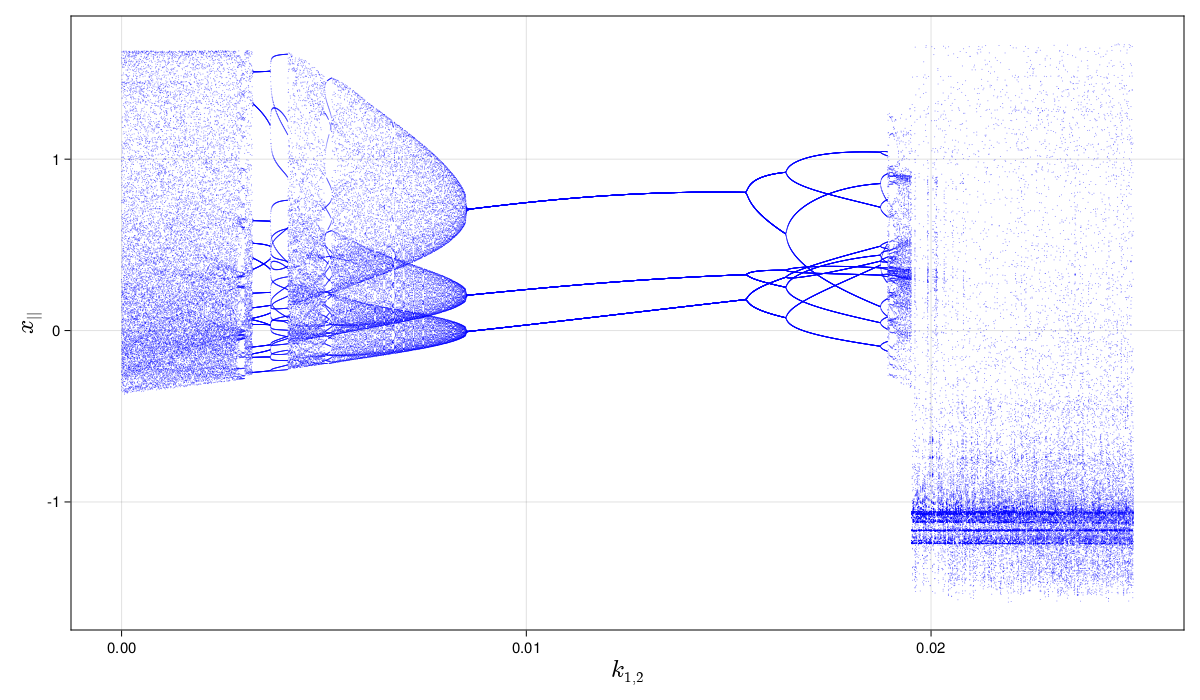

In [78]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)
for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 0.5), markersize = 1.0)
end
fig

In [77]:
save("x_sum_electrical_18_02_2023.jld", "data", x_sum)

### Попытка понять, что за г справа от нуля

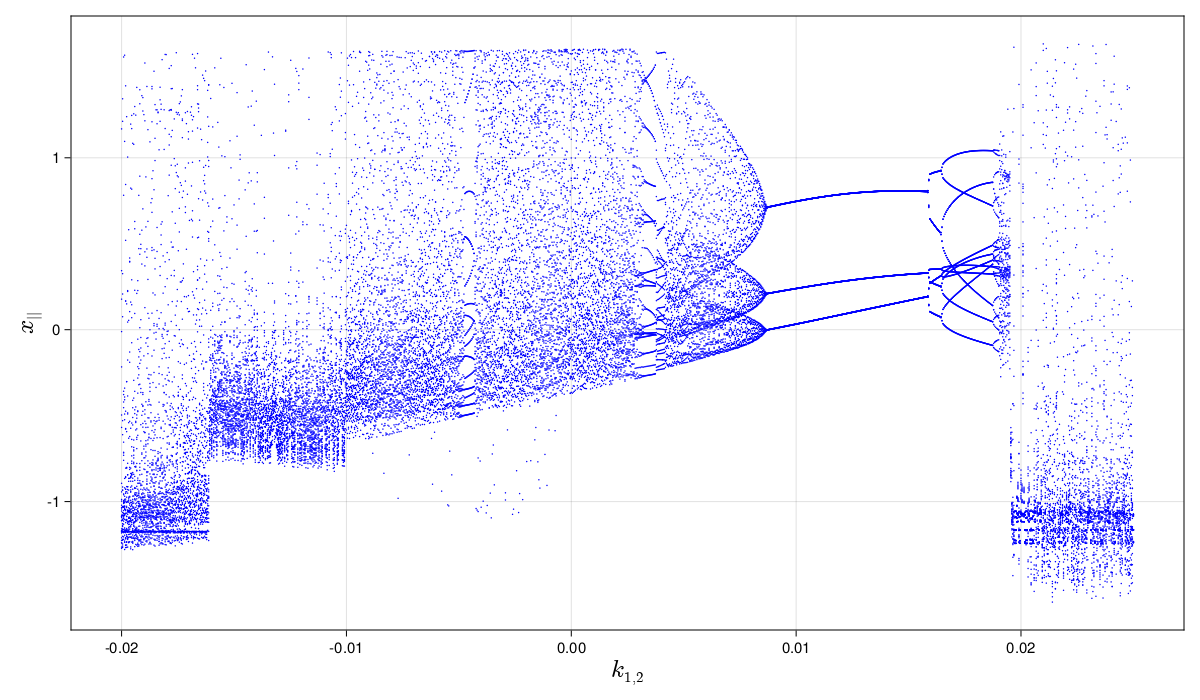

In [22]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 1.5)
end
fig

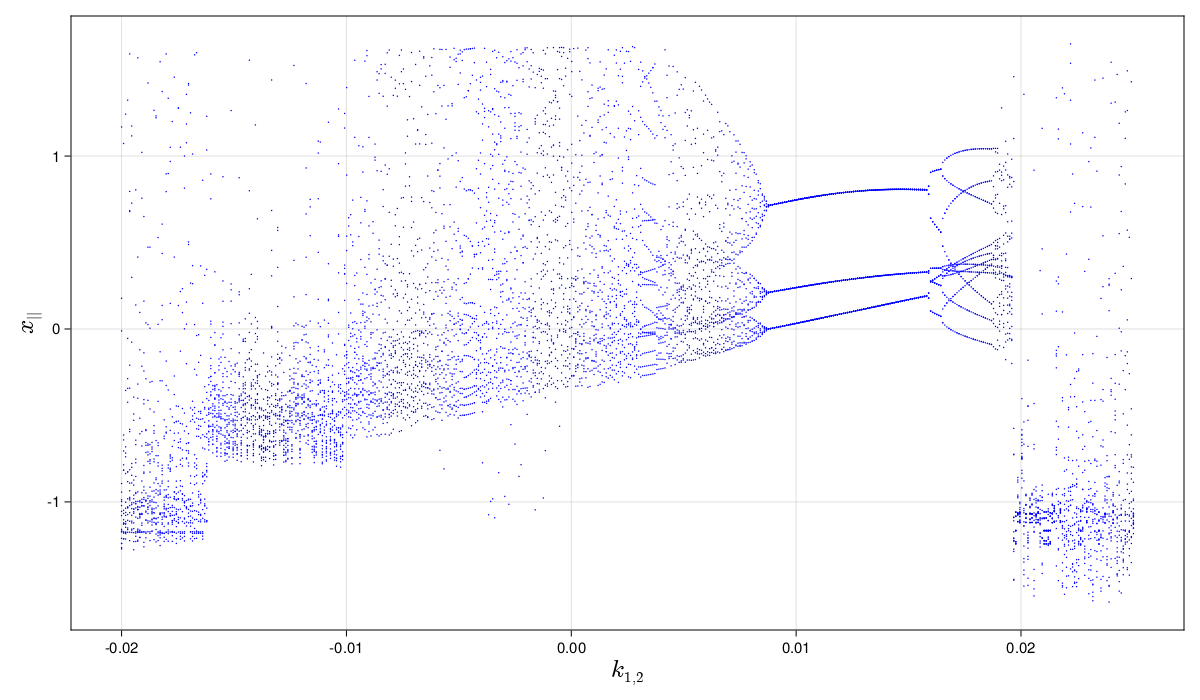

In [14]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 1.5)
end
fig

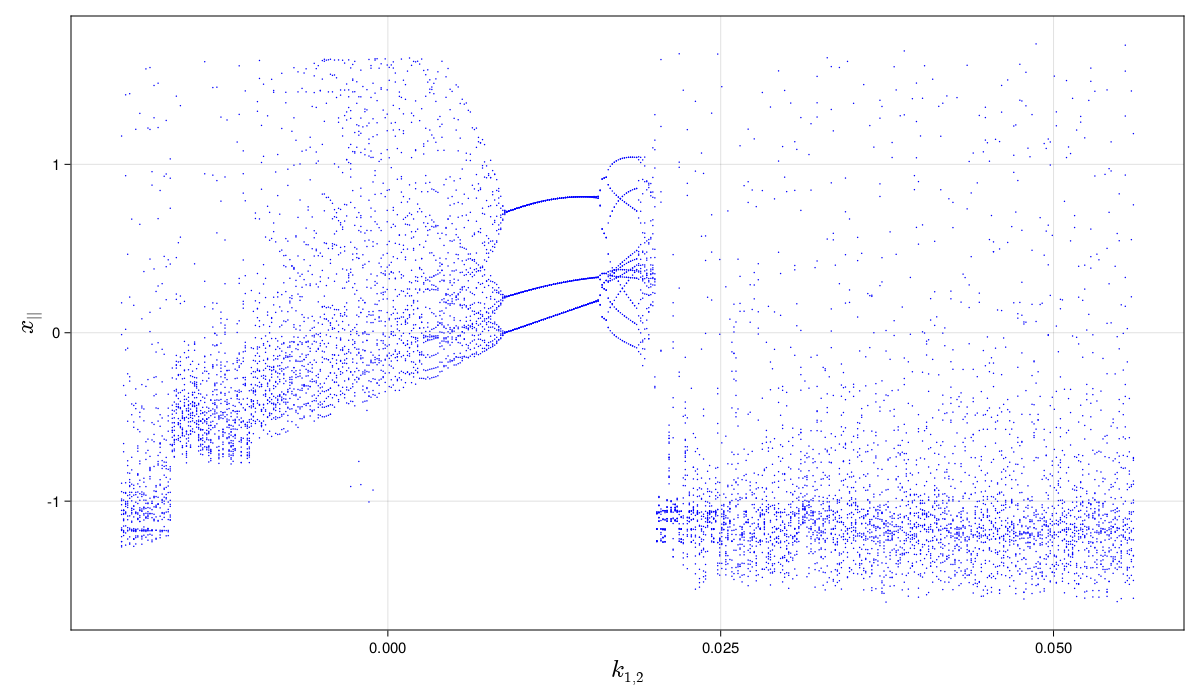

In [123]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 1.5)
end
fig

### range[-0.1; 0.056]

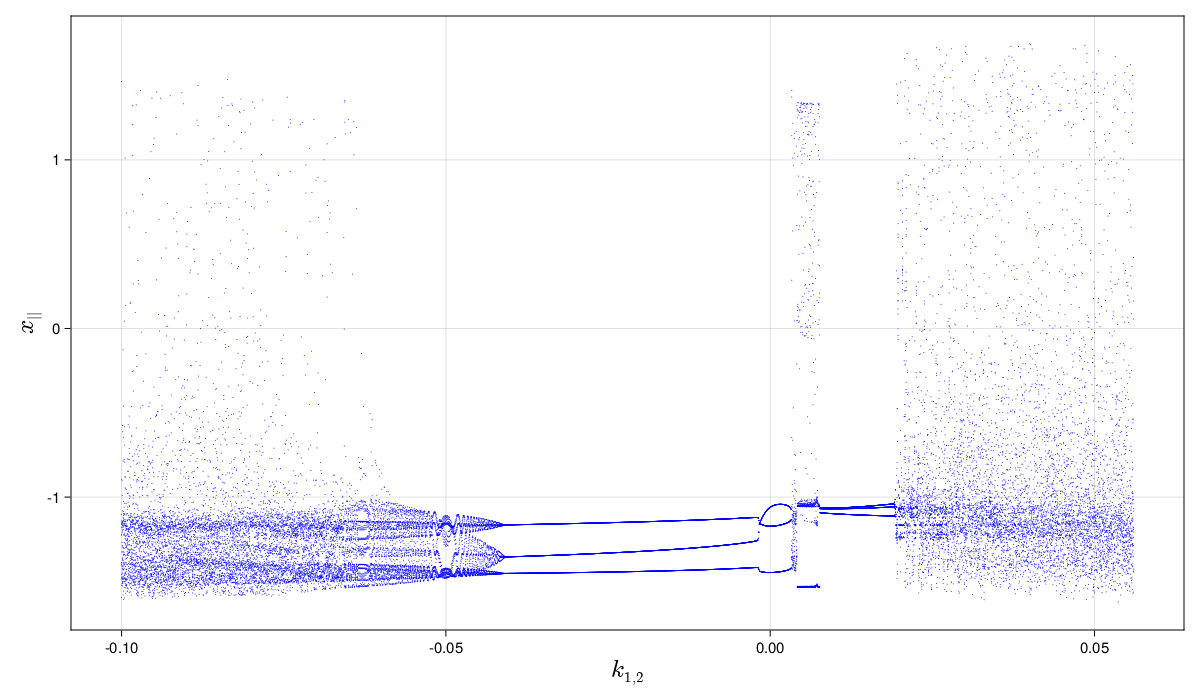

In [99]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 1.0)
end
fig

In [ ]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 1.0)
end
ylims!(axis, -1.5, -0.8)
fig

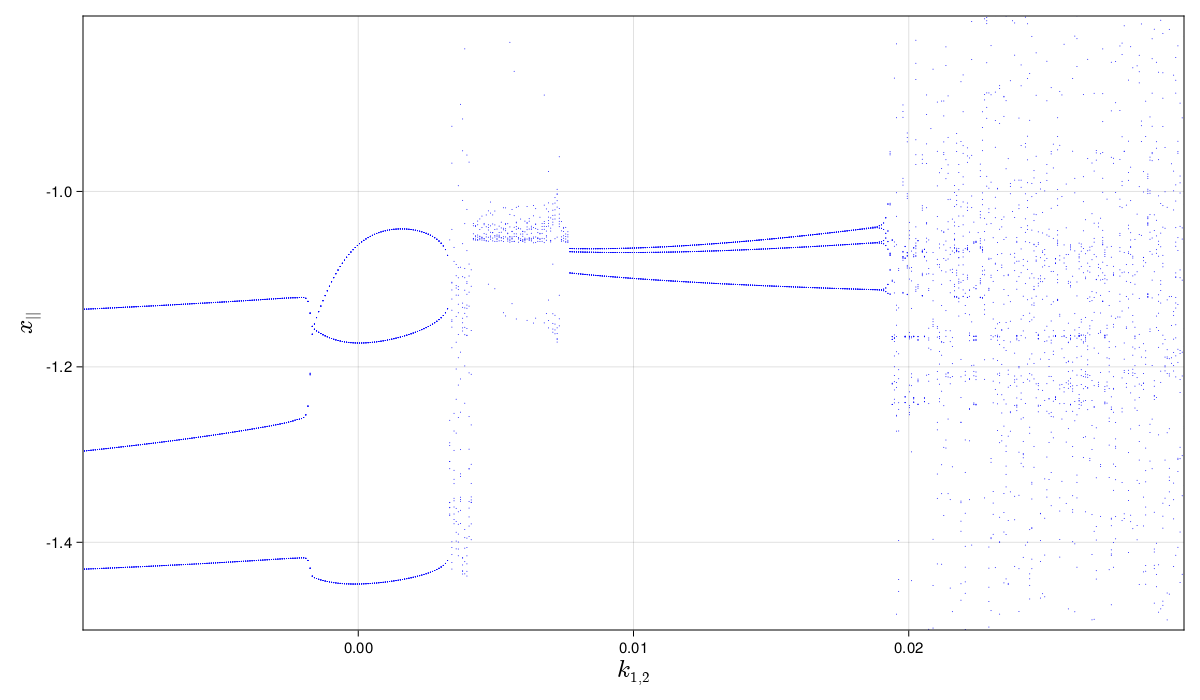

In [106]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 1.0)
end
ylims!(axis, -1.5, -0.8)
xlims!(axis, -0.01, 0.03)
fig

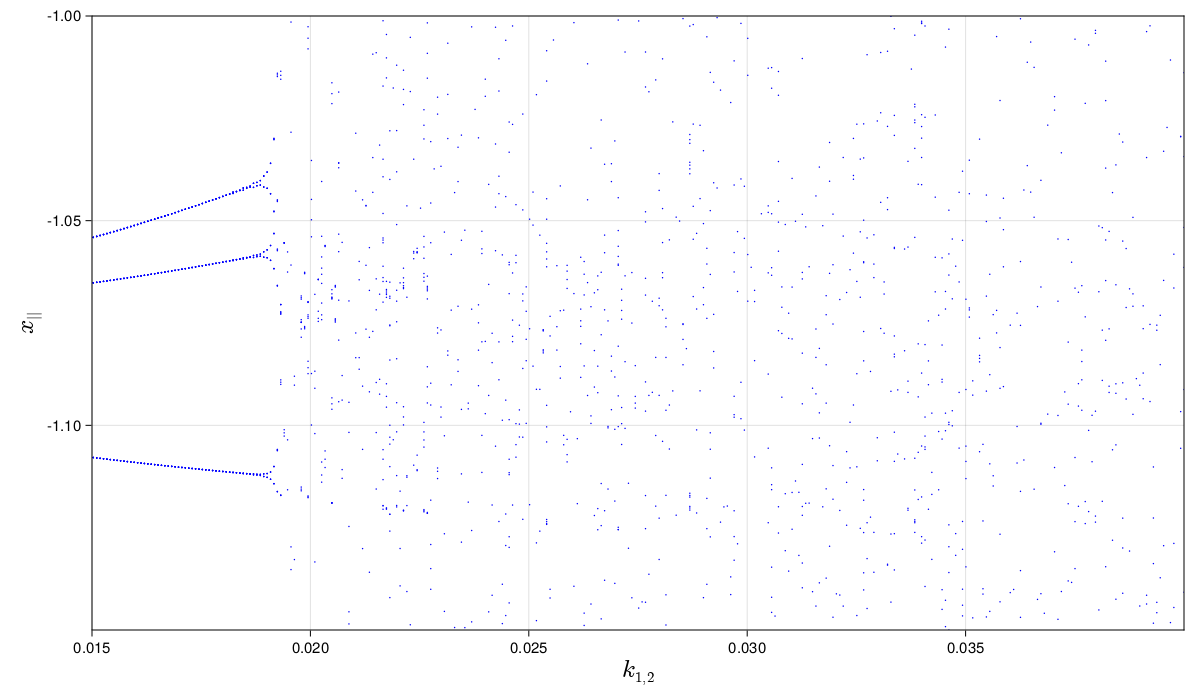

In [105]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 1.5)
end
xlims!(axis, 0.015, 0.04)
ylims!(axis, -1.15, -1.)
fig

### range [0.0; 0.056]

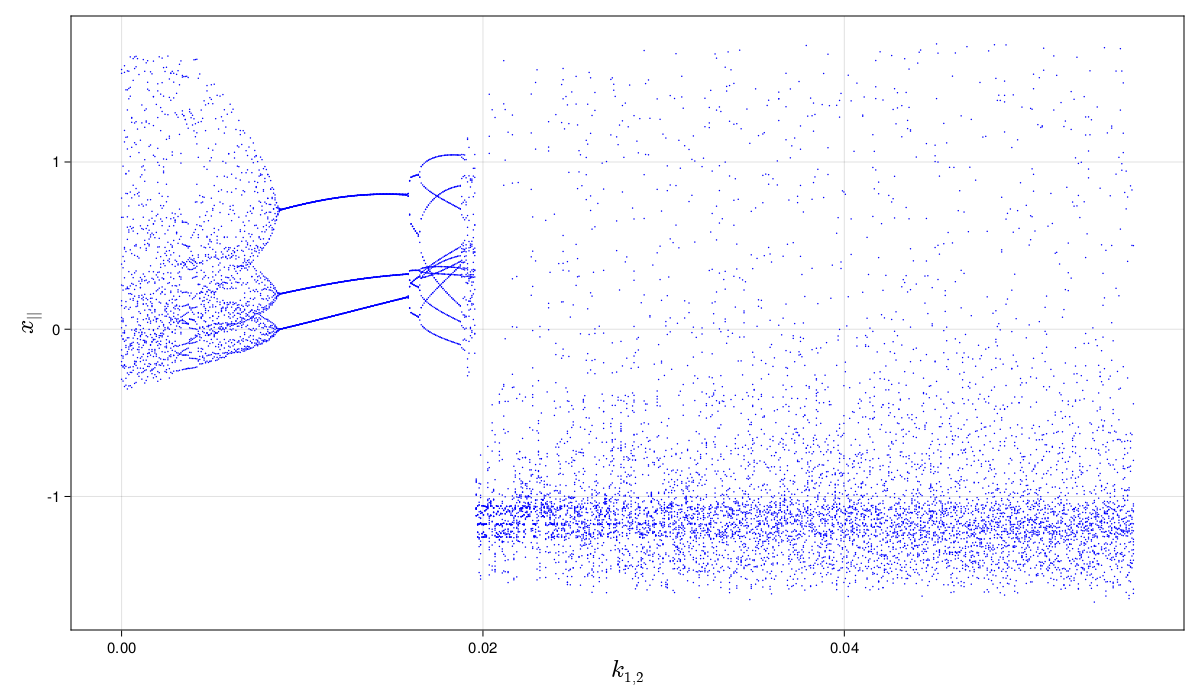

In [40]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 1.5)
end
fig